In [12]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [3]:
dataset_name = "house_prices"

In [4]:
DIR_WITH_INFO = "./data/{}/second_test/".format(dataset_name)

In [5]:
json_file= open(DIR_WITH_INFO + "scores_info.txt", "r") 
scores_info = json.load(json_file)
json_file= open(DIR_WITH_INFO + "iters_info.txt", "r") 
iters_info = json.load(json_file)

In [6]:
scores_info['GRS'] = {'mean': 0.6944, 'std': 0.0026}
scores_info['RS'] = {'mean': 0.6926, 'std': 0.0028} #from first experiment 
grid_and_default = (0.6829, 0.6727)

In [7]:
max_score = max(max(grid_and_default), scores_info['GRS']['mean'], scores_info['RS']['mean'])

In [8]:
iters_labels = list(iters_info.keys())
iters_info = list(iters_info.values())

means_iters = []
std_iters = []

for experiment in iters_info:
    means_iters.append(experiment['mean'])
    std_iters.append(experiment['std'])

In [9]:
scores_labels = list(scores_info.keys())
scores_info = list(scores_info.values())

means_scores = []
std_scores = []


z = 1.96
n = 10
for experiment in scores_info:
    means_scores.append(experiment['mean'])
    std_scores.append(experiment['std'])

In [17]:
conf_std = (np.array(std_scores)*z)/np.sqrt(n)
upper_conf = means_scores + conf_std
lower_conf = means_scores - conf_std
confidence = pd.DataFrame([scores_labels, lower_conf, upper_conf]).T
confidence.columns = ["method", "lower_bound", "upper_bound"]

In [19]:
confidence.sort_values("method").set_index("method")

,lower_bound,upper_bound
method,,
GRS,0.692789,0.696011
GRS_10,0.6964,0.700698
GRS_100,0.694927,0.698303
GRS_25,0.693824,0.69855
GRS_50,0.695121,0.697633
RS,0.690865,0.694335
RS_10,0.665068,0.673507
RS_100,0.684474,0.69105
RS_25,0.672947,0.681182


In [9]:
def autolabel(rects, add=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()+add
        ax.annotate('{}'.format(round(height-add,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

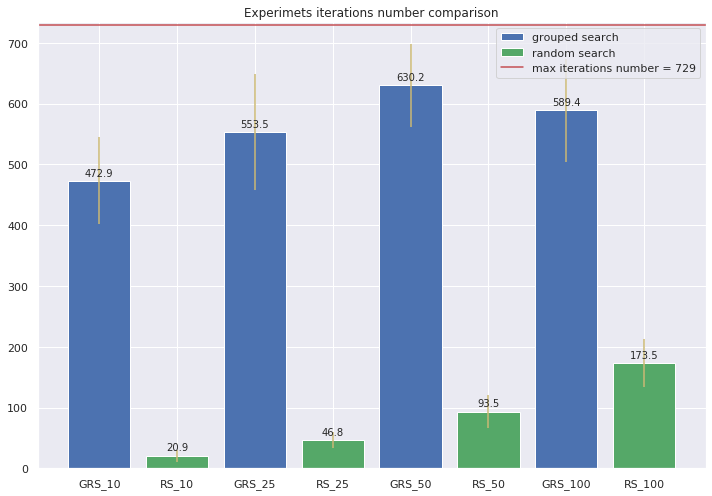

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(range(len(iters_labels)), means_iters,
        yerr=std_iters, align="center", ecolor = 'y', color = ('b','g'))

ax.set_xticks(range(0,len(iters_labels)))
ax.set_xticklabels(iters_labels)

line = ax.axhline(729, color='r', label = 'max_iter_num')
autolabel(rects1)
ax.set_title('Experimets iterations number comparison')
plt.legend(handles= (rects1[::2],rects1[1::2],line),
           labels = ('grouped search', 'random search', 'max iterations number = 729'),
           loc = 'upper right')
fig.tight_layout()
plt.savefig("../graphs/test_full/iter_comp.jpg")
plt.show()

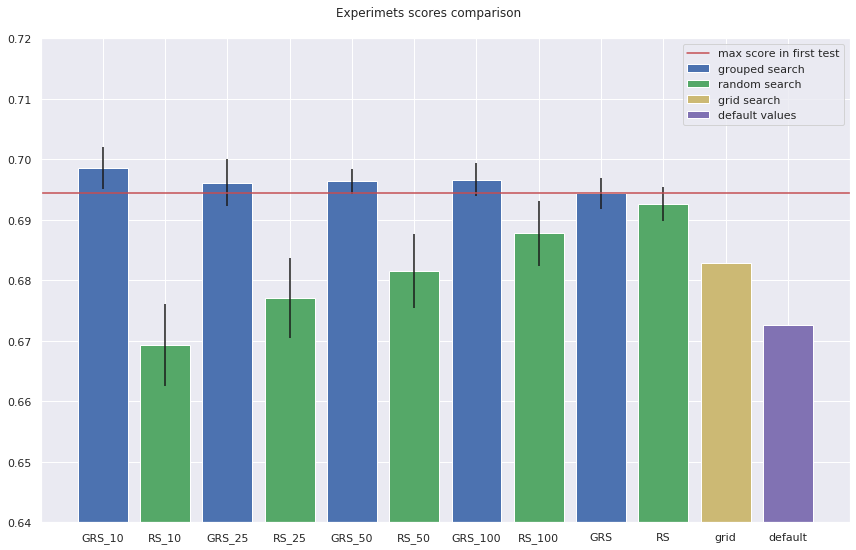

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8))
full_scores_labels = scores_labels.copy()
full_scores_labels.extend(['grid', 'default'])


rects3 = axs.bar(range(len(scores_labels)), means_scores,
        yerr=std_scores, align="center", ecolor = 'k', color = ('b','g'))

rects3_and_half = axs.bar(range(len(scores_labels), 
                                   len(scores_labels)+len(grid_and_default)), 
                             grid_and_default,
                             align="center", color = ('y', 'm'))

axs.set_xticks(range(0,len(full_scores_labels)))
axs.set_xticklabels(full_scores_labels)
line = axs.axhline(max_score, color='r')
axs.set_ylim(0.64, 0.72)

plt.legend(handles= (line, rects3[::2], rects3[1::2], 
                     rects3_and_half[0], rects3_and_half[1]),
           labels = ('max score in first test', 'grouped search', 'random search', 
                    'grid search', 'default values'),
           loc = 'best')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.suptitle('Experimets scores comparison')
plt.savefig("../graphs/test_full/scores_comp.jpg")
plt.show()